In this notebook, the final figure is created. It is dependence of frequency on the $\mathcal{E}_{\rm dd}$ parameter

# import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
fx = 18.5 # Hz
wx = 2*np.pi*fx
wx = 1.263E-04 # https://www.wolframalpha.com/input/?i=2*pi*18.5Hz+%2F+%28hbar+%2F+%28%28162+atomic+mass+unit%29+*+%28390+bohr+radius%29%5E2%29%29


mf_frequencies = pd.DataFrame(
    [{"eps_dd": 1.38, "path": "../reproduce-mflhy-theory/eps-dd=1.38/3-estimate-freqs/small-box-small-dx-2/3-analyze-frequency/frequencies.txt", "theory": "MFLHY"},
    ])

def get_freqs(path):
    freqs = np.loadtxt(path)
    sf_freq = np.min(freqs)
    lattice_freq = np.max(freqs)
    return sf_freq/wx, lattice_freq/wx




# Create columns sf_freq and lattice_freq
mf_frequencies["sf_freq"], mf_frequencies["lattice_freq"] = zip(*mf_frequencies["path"].map(get_freqs))
mf_frequencies


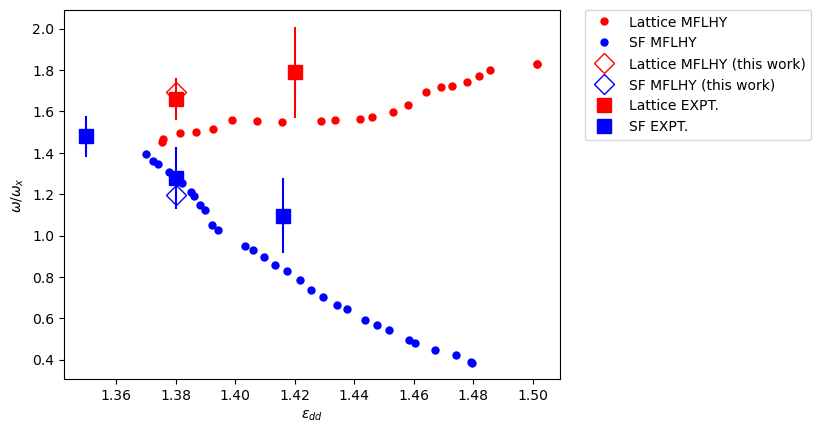

In [66]:

# Load the data
lattice_freq_expt = pd.read_csv("../digitalized-figures/digit_fig1_lattice_EXPT.csv")
sf_freq_expt = pd.read_csv("../digitalized-figures/digit_fig1_sf_EXPT.csv")

lattice_freq_mf = pd.read_csv("../digitalized-figures/digit_fig1_lattice.csv")
sf_freq_mf = pd.read_csv("../digitalized-figures/digit_fig1_sf.csv")

# Plot the digitalized data

plt.errorbar(lattice_freq_expt["eps_dd"], 
             lattice_freq_expt["omega"], 
             lattice_freq_expt["omega_err"], 
             # put Box marker
             marker='s',
             # put marker size 5    
             markersize=10,
             ls='', label="Lattice EXPT.",
             color='red')

plt.errorbar(sf_freq_expt["eps_dd"], 
             sf_freq_expt["omega"], 
             sf_freq_expt["omega_err"], 
             # put Box marker
             marker='s',
             # put marker size 5    
             markersize=10,
             ls='', label="SF EXPT.",
             color='blue')

plt.plot(lattice_freq_mf["eps_dd"], 
         lattice_freq_mf["omega"], 
        # put circle marker
        marker='o',
        # put marker size 5    
        markersize=5,
        ls='', label="Lattice MFLHY",
        color='red')

plt.plot(sf_freq_mf["eps_dd"], 
         sf_freq_mf["omega"], 
        # put circle marker
        marker='o',
        # put marker size 5    
        markersize=5,
        ls='', label="SF MFLHY",
        color='blue')


# Plot mf_frequencies
plt.plot(mf_frequencies["eps_dd"],
                mf_frequencies["lattice_freq"],
                # put circle marker
                marker='D',
                # put marker size 5
                markersize=10,
                ls='', label="Lattice MFLHY (this work)",
                # empty marker
                markerfacecolor='none',
                color='red')

plt.plot(mf_frequencies["eps_dd"],
                mf_frequencies["sf_freq"],
                # put circle marker
                marker='D',
                # put marker size 5
                markersize=10,
                ls='', label="SF MFLHY (this work)",
                color='blue',
                # empty marker
                markerfacecolor='none'
                )



plt.xlabel(r"$\epsilon_{dd}$")
plt.ylabel(r"$\omega/\omega_{x}$")

# put legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)